# Práctica #8: Marketing

Swietenia Naomi Medina Gasca

Lunes 30 de Junio de 2025

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Extracción

In [22]:
campanas = pd.read_csv('VER_campañas_marketing.csv')
campanas.head(5)

,campaign_id,tipo_campaña,fecha_inicio,fecha_fin,presupuesto,clicks,conversiones,channel_id,customer_id
0,1,Google Ads,2023-01-01,NaN,1333.10,932,148,5,NaN
1,2,SEO,2023-01-02,2023-01-11,2938.55,362,20,3,NaN
2,3,Email,2023-01-03,2023-01-12,4428.26,889,50,2,183.0
3,4,Google Ads,2023-01-04,2023-01-13,3795.01,568,-1,5,142.0
4,5,Google Ads,2023-01-05,2023-01-14,4129.53,1279,163,3,232.0


In [23]:
canales = pd.read_csv('VER_canales_marketing.csv')
canales.head(5)

,channel_id,canal,costo_por_click,equipo_responsable
0,1,Email,0.10,Equipo A
1,2,Facebook Ads,0.50,Equipo B
2,3,Google Ads,0.30,NaN
3,4,Instagram Ads,500.00,Equipo C
4,5,SEO,0.05,NaN


In [24]:
clientes = pd.read_csv('VER_clientes.csv')
canales.head(5)

,channel_id,canal,costo_por_click,equipo_responsable
0,1,Email,0.10,Equipo A
1,2,Facebook Ads,0.50,Equipo B
2,3,Google Ads,0.30,NaN
3,4,Instagram Ads,500.00,Equipo C
4,5,SEO,0.05,NaN


## Transformar

In [26]:
#eliminar campos nulos
campanas=campanas.dropna()
canales=canales.dropna()
clientes=clientes.dropna()

In [32]:
#merge de los 3 archivos

# Merge campanas y canales
campanas_canales = pd.merge(campanas, canales, on='channel_id', how='left')

# Merge de resultado con clientes
MKT_final = pd.merge(campanas_canales, clientes, on='customer_id', how='left')

display(MKT_final.head(2))

,campaign_id,tipo_campaña,fecha_inicio,fecha_fin,presupuesto,clicks,conversiones,channel_id,customer_id,canal,costo_por_click,equipo_responsable,edad,genero,pais,segmento,fecha_registro
0,3,Email,2023-01-03,2023-01-12,4428.26,889,50,2,183.0,Facebook Ads,0.5,Equipo B,NaN,NaN,NaN,NaN,NaN
1,4,Google Ads,2023-01-04,2023-01-13,3795.01,568,-1,5,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# exportar
MKT_final.to_csv('MKT_final.csv', index=False)

print("datos exportados correctamente")


datos exportados correctamente


## Visualización

### Barras horizontales que agrupe los datos por tipo_campaña y calcula el ROI promedio ((conversiones/presupuesto)*100).

/tmp/ipython-input-38-3880372759.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  roi_por_tipo_campana = MKT_final.groupby('tipo_campaña').apply(lambda x: (x['conversiones'].sum() / x['presupuesto'].sum()) * 100).reset_index(name='ROI_promedio')
/tmp/ipython-input-38-3880372759.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ROI_promedio', y='tipo_campaña', data=roi_por_tipo_campana, palette='viridis')


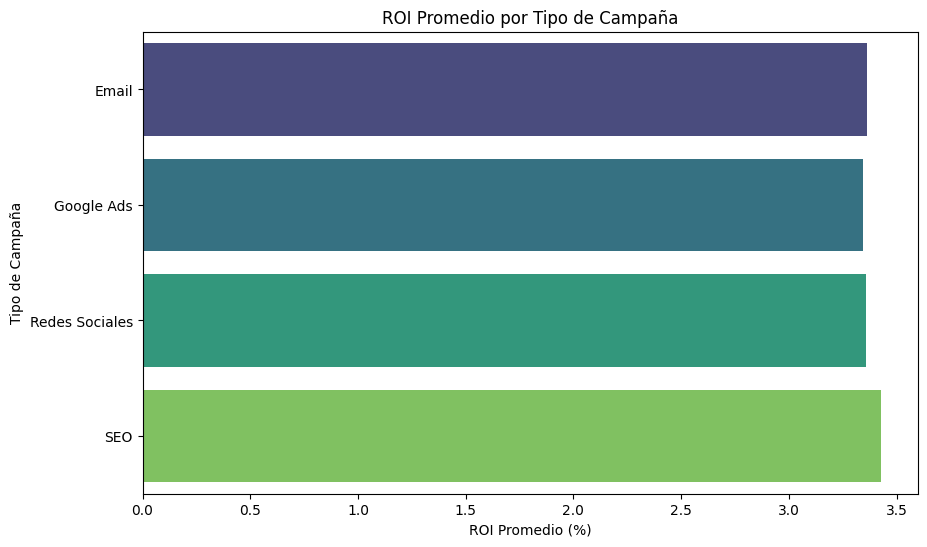

In [38]:
roi_por_tipo_campana = MKT_final.groupby('tipo_campaña').apply(lambda x: (x['conversiones'].sum() / x['presupuesto'].sum()) * 100).reset_index(name='ROI_promedio')

# Crear grafica
plt.figure(figsize=(10, 6))
sns.barplot(x='ROI_promedio', y='tipo_campaña', data=roi_por_tipo_campana, palette='viridis')
plt.title('ROI Promedio por Tipo de Campaña')
plt.xlabel('ROI Promedio (%)')
plt.ylabel('Tipo de Campaña')
plt.show()


### Gráfico de líneas con la tendencia mensual de conversiones (añade la línea).

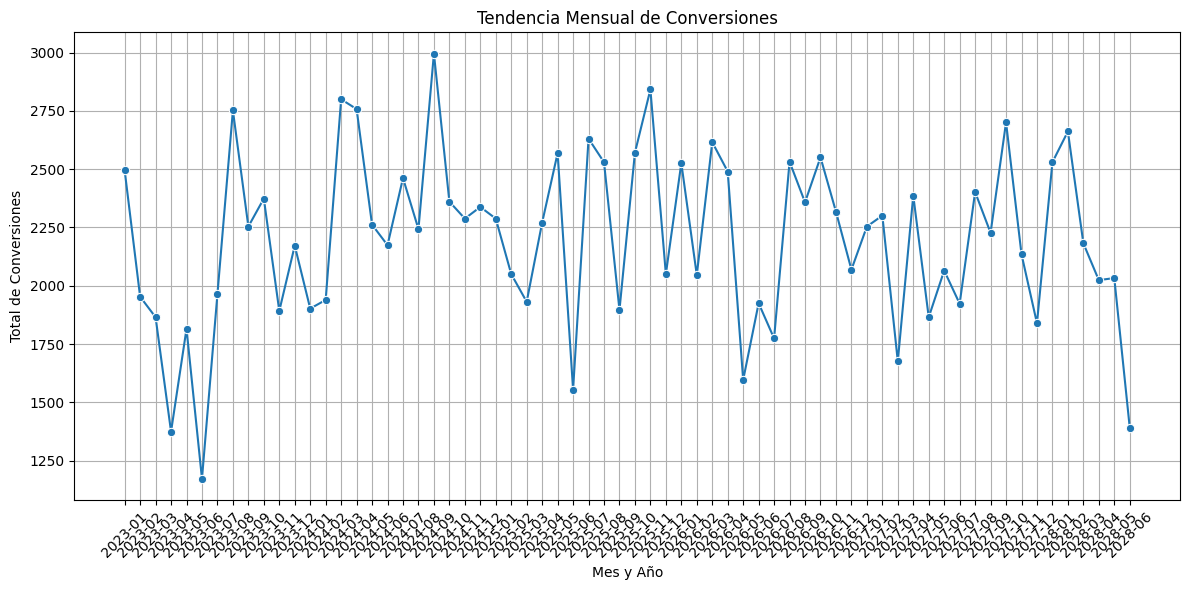

In [39]:
MKT_final['fecha_inicio'] = pd.to_datetime(MKT_final['fecha_inicio'])

MKT_final['mes_año'] = MKT_final['fecha_inicio'].dt.to_period('M')

conversiones_mensuales = MKT_final.groupby('mes_año')['conversiones'].sum().reset_index()

conversiones_mensuales['mes_año'] = conversiones_mensuales['mes_año'].astype(str)

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(x='mes_año', y='conversiones', data=conversiones_mensuales, marker='o')
plt.title('Tendencia Mensual de Conversiones')
plt.xlabel('Mes y Año')
plt.ylabel('Total de Conversiones')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### De pastel con la distribución de presupuesto por campañas.

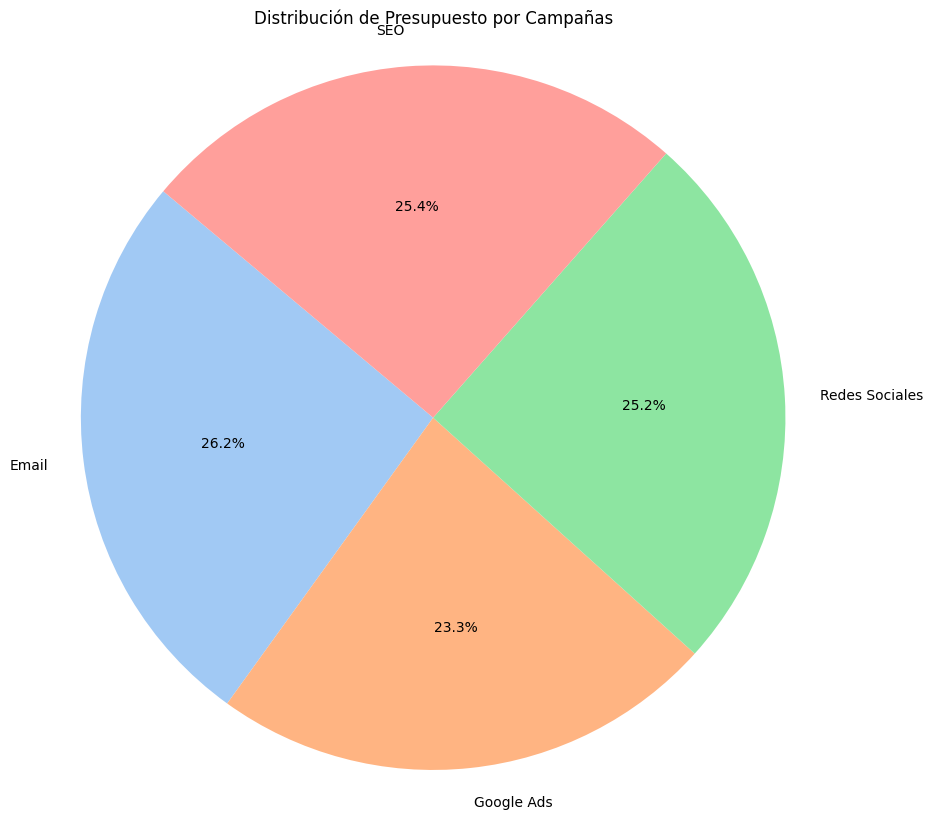

In [41]:
# Agrupar por campaña y sumar el presupuesto
presupuesto_por_campana = MKT_final.groupby('tipo_campaña')['presupuesto'].sum().reset_index()

# Crear el gráfico de pastel
plt.figure(figsize=(10, 10))
plt.pie(presupuesto_por_campana['presupuesto'], labels=presupuesto_por_campana['tipo_campaña'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribución de Presupuesto por Campañas')
plt.axis('equal')
plt.show()

# Situaciones

### ¿El canal Google Ads tiene un ROI significativamente mayor que Facebook Ads?

In [43]:
google_ads_data = MKT_final[MKT_final['tipo_campaña'] == 'Google Ads']
facebook_ads_data = MKT_final[MKT_final['tipo_campaña'] == 'Facebook Ads']

google_conversions = google_ads_data['conversiones'].sum()
google_budget = google_ads_data['presupuesto'].sum()
facebook_conversions = facebook_ads_data['conversiones'].sum()
facebook_budget = facebook_ads_data['presupuesto'].sum()

google_roi = (google_conversions / google_budget) * 100 if google_budget > 0 else 0
facebook_roi = (facebook_conversions / facebook_budget) * 100 if facebook_budget > 0 else 0

print(f"ROI for Google Ads: {google_roi:.2f}%")
print(f"ROI for Facebook Ads: {facebook_roi:.2f}%")


if google_roi > facebook_roi:
    print("Google Ads tiene mas ROI que Facebook Ads.")
elif facebook_roi > google_roi:
    print("Facebook Ads tiene mas ROI que Google Ads.")
else:
    print("El ROI de Google Ads y Facebook Ads es similar.")


ROI for Google Ads: 3.34%
ROI for Facebook Ads: 0.00%
Google Ads tiene mas ROI que Facebook Ads.


### Si el presupuesto se reduce en un 30%, ¿qué tipo de campaña debería priorizarse para mantener las conversiones?

In [47]:
campana_ROI_mayor = roi_por_tipo_campana.loc[roi_por_tipo_campana['ROI_promedio'].idxmax()]
print(f"Si el presupuesto se reduce en un 30%, se debe priorizar el tipo de campaña '{campana_ROI_mayor['tipo_campaña']}' debido a que tiene el ROI promedio más alto, con un {campana_ROI_mayor['ROI_promedio']:.2f}%.")

Si el presupuesto se reduce en un 30%, se debe priorizar el tipo de campaña 'SEO' debido a que tiene el ROI promedio más alto, con un 3.43%.


### El equipo de marketing sospecha que las campañas de Email tienen mayor efectividad en meses fríos (por ejemplo diciembre-enero), mientras que las de Redes Sociales funcionan mejor en verano (junio-agosto). ¿Los datos respaldan esta hipótesis? Justifica tu respuesta con un gráfico de tendencia mensual y análisis estadístico básico (promedios por temporada).

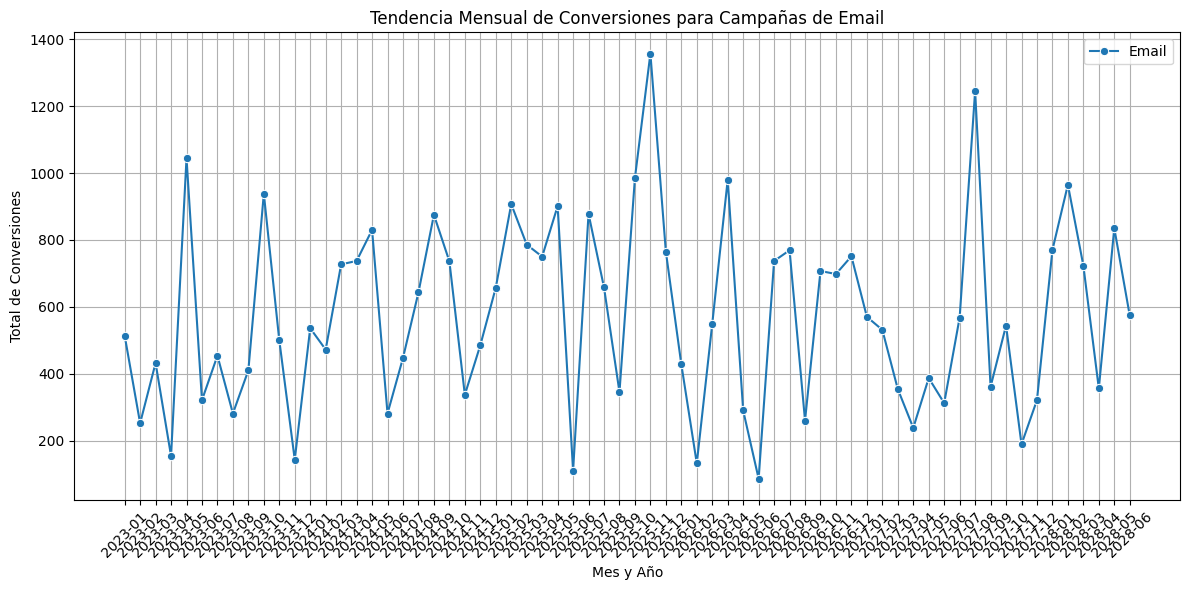

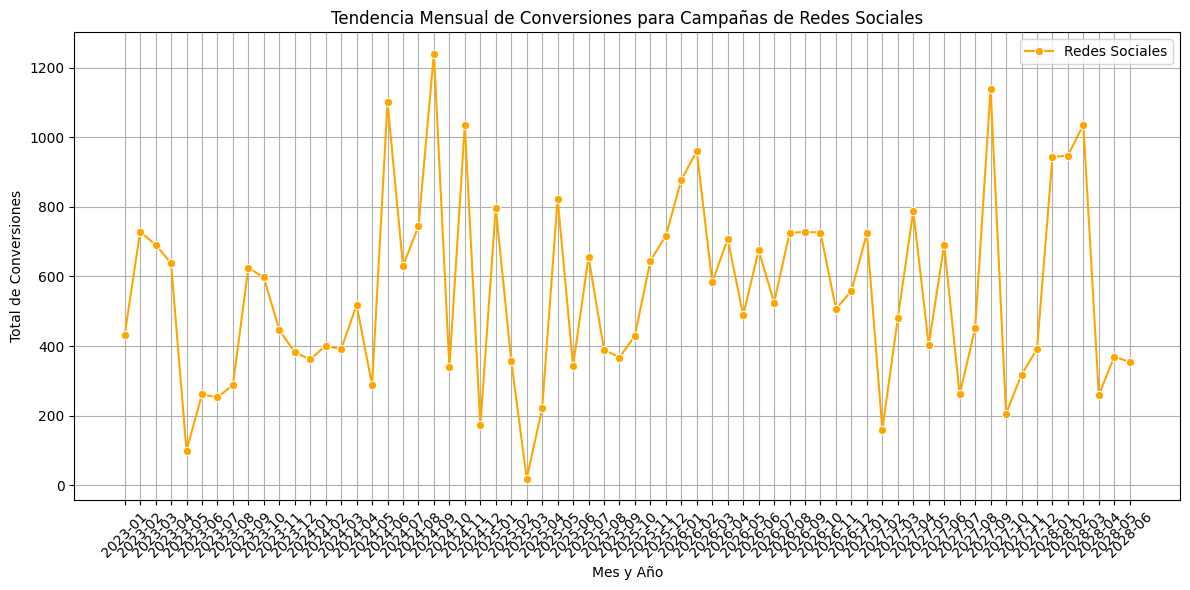


Análisis por Temporada:
Promedio conversiones de Email en Invierno (Dic-Ene): 84.86
Promedio conversiones de Redes Sociales en Verano (Jun-Ago): 98.20
Promedio de conversiones para campañas de Email en otras temporadas: 94.30
Promedio de conversiones para campañas de Redes Sociales en otras temporadas: 91.98


In [52]:
email_campaigns = MKT_final[MKT_final['tipo_campaña'] == 'Email']
social_media_campaigns = MKT_final[MKT_final['tipo_campaña'] == 'Redes Sociales']

email_conversions_monthly = email_campaigns.groupby('mes_año')['conversiones'].sum().reset_index()
social_media_conversions_monthly = social_media_campaigns.groupby('mes_año')['conversiones'].sum().reset_index()

email_conversions_monthly['mes_año'] = email_conversions_monthly['mes_año'].astype(str)
social_media_conversions_monthly['mes_año'] = social_media_conversions_monthly['mes_año'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(x='mes_año', y='conversiones', data=email_conversions_monthly, marker='o', label='Email')
plt.title('Tendencia Mensual de Conversiones para Campañas de Email')
plt.xlabel('Mes y Año')
plt.ylabel('Total de Conversiones')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='mes_año', y='conversiones', data=social_media_conversions_monthly, marker='o', color='orange', label='Redes Sociales')
plt.title('Tendencia Mensual de Conversiones para Campañas de Redes Sociales')
plt.xlabel('Mes y Año')
plt.ylabel('Total de Conversiones')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


def get_season(month):
    if month in [12, 1]:
        return 'Winter (Dec-Jan)'
    elif month in [6, 7, 8]:
        return 'Summer (Jun-Aug)'
    else:
        return 'Other'

MKT_final['month'] = MKT_final['fecha_inicio'].dt.month
MKT_final['season'] = MKT_final['month'].apply(get_season)

email_seasonal_data = MKT_final[(MKT_final['tipo_campaña'] == 'Email') & (MKT_final['season'] == 'Winter (Dec-Jan)')]
social_media_seasonal_data = MKT_final[(MKT_final['tipo_campaña'] == 'Redes Sociales') & (MKT_final['season'] == 'Summer (Jun-Aug)')]

email_avg_winter_conversions = email_seasonal_data['conversiones'].mean()
social_media_avg_summer_conversions = social_media_seasonal_data['conversiones'].mean()

print(f"\nAnálisis por Temporada:")
print(f"Promedio conversiones de Email en Invierno (Dic-Ene): {email_avg_winter_conversions:.2f}")
print(f"Promedio conversiones de Redes Sociales en Verano (Jun-Ago): {social_media_avg_summer_conversions:.2f}")

email_avg_other_conversions = MKT_final[(MKT_final['tipo_campaña'] == 'Email') & (MKT_final['season'] == 'Other')]['conversiones'].mean()
social_media_avg_other_conversions = MKT_final[(MKT_final['tipo_campaña'] == 'Redes Sociales') & (MKT_final['season'] == 'Other')]['conversiones'].mean()

print(f"Promedio de conversiones para campañas de Email en otras temporadas: {email_avg_other_conversions:.2f}")
print(f"Promedio de conversiones para campañas de Redes Sociales en otras temporadas: {social_media_avg_other_conversions:.2f}")
